In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
x = cancer.data
y = cancer.target

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [5]:
import numpy as np

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [21]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad
                
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

In [22]:
neuron = LogisticNeuron()

In [23]:
neuron.fit(x_train, y_train)

C:\Users\junwo\AppData\Local\Temp/ipykernel_21332/2913606258.py:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


In [24]:
np.mean(neuron.predict(x_test) == y_test)

C:\Users\junwo\AppData\Local\Temp/ipykernel_21332/2913606258.py:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

In [34]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0],1)), x]
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range (epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
                
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return(np.mean(self.predict(x) == y))

In [37]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

C:\Users\junwo\AppData\Local\Temp/ipykernel_21332/1273053793.py:21: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8947368421052632

In [40]:
import matplotlib.pyplot as plt

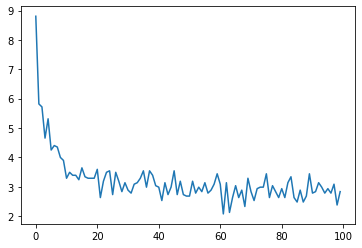

In [42]:
plt.plot(layer.losses)
plt.show()

In [43]:
from sklearn.linear_model import SGDClassifier

In [45]:
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42)

In [46]:
sgd.fit(x_train, y_train)

SGDClassifier(loss='log', max_iter=100, random_state=42)

In [47]:
sgd.score(x_test, y_test)

0.8333333333333334

In [48]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [49]:
y_test[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [53]:
a = np.arange(10)
np.clip(a, 3, 8)

array([3, 3, 3, 3, 4, 5, 6, 7, 8, 8])

In [55]:
len(layer.losses)

100

In [82]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x = cancer.data
y = cancer.target

In [80]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2)

In [85]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8859649122807017

In [70]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', random_state = 5)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9736842105263158

In [66]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2)

In [86]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8771929824561403

In [87]:
print(cancer.feature_names[[2,3]])

['mean perimeter' 'mean area']


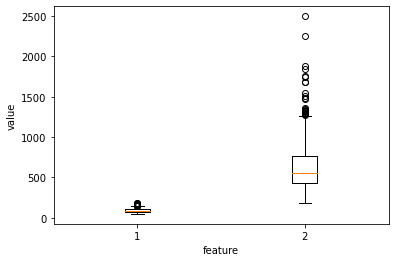

In [89]:
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = learning_rate
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0],1)), x]
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range (epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
                
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self, x, y):
        return(np.mean(self.predict(x) == y))